In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.integrate as si
import numpy as np
from scipy.signal import find_peaks
import time
from datetime import datetime
from matplotlib import collections as matcoll
from pylab import rcParams

In [2]:
sns.set()
rcParams['figure.figsize'] = 10, 5

In [3]:
event = pd.read_csv('OneDrive/Desktop/SafeStreet_1\TWO_WHEELER_MOUNTER_28_02_2020-04_22_30_Redmi Note 6 Pro_150/AllDetails1.csv')
event.head()

,x,y,z,latitude,longitude,bearing,accuracy,light,timestamp,Unnamed: 9
0,0.217534,0.039432,9.351701,23.555270,87.29111,-2.39078,3.216,4472,154027618,0
1,-0.020142,0.181899,9.365051,23.555276,87.29111,-2.39078,3.216,4472,154027689,0
2,0.007306,0.007380,9.348685,23.555276,87.29111,-2.39078,3.216,4440,154027763,0
3,0.119876,0.412266,9.350114,23.555276,87.29111,-2.39078,3.216,4440,154027775,0
4,0.139274,0.384174,9.344446,23.555276,87.29111,-2.39078,3.216,4440,154027786,0


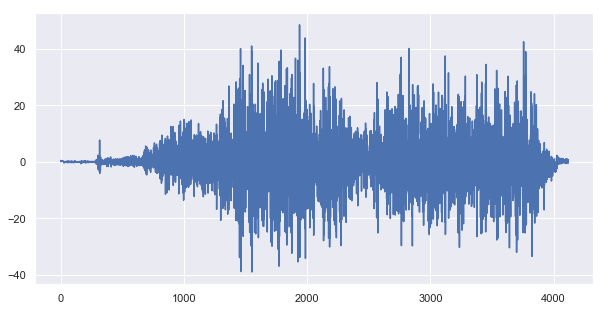

In [4]:
plt.plot(event.y)

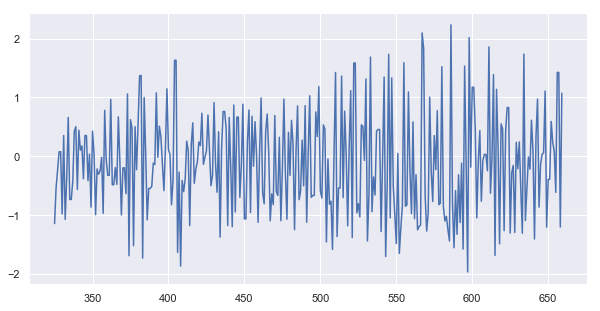

In [5]:
plt.plot(event.y[325:660])

In [6]:
pos_noise=0
c=0
for i in event.y[325:660]:
    if(i>0):
        c+=1
        pos_noise += i
av_pos_noise = pos_noise/c
av_pos_noise

0.688440617328767

In [7]:
neg_noise=0
c=0
for i in event.y[325:660]:
    if(i<0):
        c+=1
        neg_noise += i
av_neg_noise = neg_noise/c
av_neg_noise

-0.7364778024867729

In [8]:
shift = (av_pos_noise+av_neg_noise)/2
shift

-0.024018592579002906

In [9]:
for i,j in zip(event.y, range(len(event.y))):
    event.loc[j, 'y'] = i - shift
# event

In [10]:
def kalmanFilter(event):
    event = np.array(event)
    size = len(event)
    n_iter = size
   
    Q = 1e-5     # process variance
   
    xhat=np.zeros(size)      # a posteri estimate of x
    P=np.zeros(size)         # a posteri error estimate
    xhatminus=np.zeros(size) # a priori estimate of x
    Pminus=np.zeros(size)    # a priori error estimate
    K=np.zeros(size)         # gain or blending factor
   
    R = 0.1**2 # estimate of measurement variance, change to see effect

    # intial guesses
    xhat[0] = 0.0
    P[0] = 1.0
   
    for k in range(1,n_iter):
        # time update
        xhatminus[k] = xhat[k-1]
        Pminus[k] = P[k-1]+Q
   
        # measurement update
        K[k] = Pminus[k]/( Pminus[k]+R )
        xhat[k] = xhatminus[k]+K[k]*(event[k]-xhatminus[k])
        P[k] = (1-K[k])*Pminus[k]
   
    return xhat

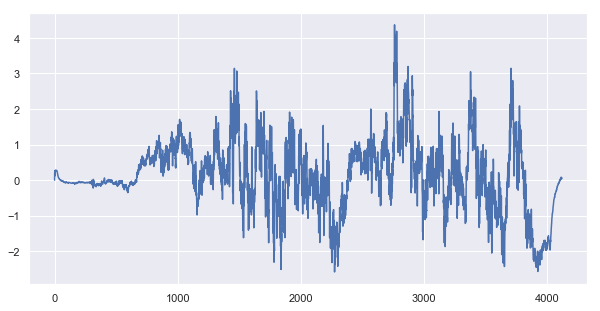

In [11]:
# # plt.plot(event['y'])
plt.plot(kalmanFilter(event.y))

In [12]:
kal_data = kalmanFilter(event.y)
kal_data

array([0.        , 0.20387883, 0.11802426, ..., 0.03928314, 0.06185185,
       0.06162164])

In [13]:
date_time = []
for index in event.index:
    p = pd.Timestamp(event.timestamp.loc[index],unit='ms',tz='Asia/Kolkata')
    date_time.append(p.time())
date_time[3]

datetime.time(0, 17, 7, 775000)

In [14]:
time = []
for i in range(len(date_time)):
    a = ((date_time[i].hour*3600 + date_time[i].minute*60 + date_time[i].second) + date_time[i].microsecond*10**(-6))
    time.append(a)
# time

In [15]:
ar = np.array(time)
event['time'] = ar

In [16]:
vel = [0]
for t,t_next,a,a_next,v in zip((event.time[0:]),(event.time[1:]),(kal_data[0:]),(kal_data[1:]),(vel)):
    if(a==0):
        v=v
    else:
        v = v + (t_next-t)*((a+a_next)/2)
    vel.append(v)
# vel

In [17]:
for i,j in zip(vel, range(len(vel))):
    vel[j] = i*3.6
# vel

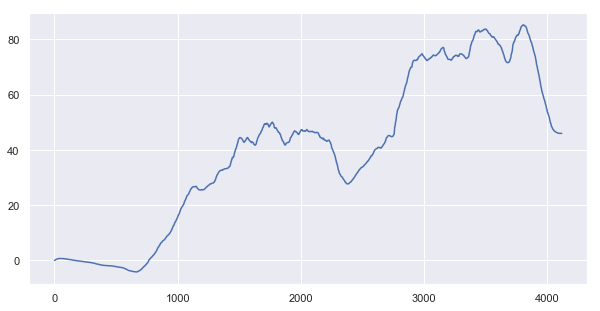

In [18]:
plt.plot(vel)

In [19]:
sum=0
for i in vel:
    sum += i
av_vel = sum/len(vel)
av_vel

40.03592771534969